In [1]:
from maelzel.core import *
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel import tui
from maelzel.common import F
import logging
logging.getLogger('maelzel.scoring').setLevel('DEBUG')

[maelzel.scoring:quant.py:1410:quantizeMeasure:DEBUG] Measure (4, 4) is not filled (events=[«0.000:2.000 2/1♩ 4C», «2.000:2.143 1/7♩ 4C#», «2.143:3.333 25/21♩ 4D»]). Filling gaps with silences


Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 21.8ms)


error,div,snapped,slots,info
0.002,"(7,)","[«0.000:0.143 1/7♩ 4C#», «0.143:1.000 6/7♩ 4D tiedNext»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.055418,"(6,)","[«0.000:0.167 1/6♩ 4C#», «0.167:1.000 5/6♩ 4D tiedNext»]","[0, 1]","gridError=0.0535, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11271,"(5,)","[«0.000:0.200 1/5♩ 4C#», «0.200:1.000 4/5♩ 4D tiedNext»]","[0, 1]","gridError=0.113, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3 - 4 (dur: 1)
Best 2 divisions: (quantized in 993.7µs)


error,div,snapped,slots,info
0,"(3,)","[«0.000:0.333 1/3♩ 4D tiedPrev», «0.333:1.000 2/3♩ rest»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10219,"(5,)","[«0.000:0.400 2/5♩ 4D tiedPrev», «0.400:1.000 3/5♩ rest»]","[0, 2]","gridError=0.102, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1668:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «0.000:1.000 1/1♩ 4C tiedNext»
)
    Node(1/1, 
  «1.000:2.000 1/1♩ 4C tiedPrev»
)
[maelzel.scoring:quant.py:1671:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «0.000:2.000 2/1♩ 4C»
)
[maelzel.scoring:quant.py:1673:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «0.000:2.000 2/1♩ 4C»
)
Node(7/4, 
  «2.000:2.143 1/7♩ 7/4 4C#»
  «2.143:3.000 6/7♩ 7/4 4D tiedNext»
)
----> not same durRatio
[maelzel.scoring:quant.py:1673:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(7/4, 
  «2.000:2.143 1/7♩ 7/4 4C#»
  «2.143:3.000 6/7♩ 7/4 4D tiedNext»
)
Node(3/2, 
  «3.000:3.333 1/3♩ 3/2 4D tiedPrev»
  «3.333:4.000 2/3♩ 3/2 rest»
)
----> not same durRatio
[maelzel.scoring:node.py:550:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(1/1, 
    «0.000:2.000 2/1♩ 4C»
  )
  Node(7/4, 
    «2.000:2.143 1/7♩ 7/4 4C#»
    «2.143:3.000 6/7♩ 7/4 4D tiedNext»
  )
  Node(3/2, 
    «3.000:3.3


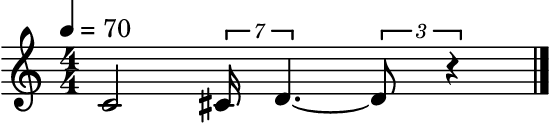

In [2]:
notes = [
    (60, F(2, 1)),
    (61, F(1, 7)),
    (62, F(6, 7)+F(1, 3))
]

struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
qprofile = scoring.quant.QuantizationProfile.fromPreset('high')
qprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=qprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1414:quantizeMeasure:DEBUG] Measure (4, 4) is not filled (events=[«0.000:2.000 2/1♩ 4C», «2.000:2.750 3/4♩ 4C#», «2.750:3.000 1/4♩ 4D#»]). Filling gaps with silences


Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 28.9ms)


error,div,snapped,slots,info
0.002,"(4,)","[«0.000:0.750 3/4♩ 4C#», «0.750:1.000 1/4♩ 4D#»]","[0, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.089132,"(7,)","[«0.000:0.714 5/7♩ 4C#», «0.714:1.000 2/7♩ 4D#»]","[0, 5]","gridError=0.088, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.17329,"(3,)","[«0.000:0.667 2/3♩ 4C#», «0.667:1.000 1/3♩ 4D#»]","[0, 2]","gridError=0.173, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1672:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «0.000:1.000 1/1♩ 4C tiedNext»
)
    Node(1/1, 
  «1.000:2.000 1/1♩ 4C tiedPrev»
)
[maelzel.scoring:quant.py:1676:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «0.000:2.000 2/1♩ 4C»
)
Node(1/1, 
  «2.000:2.750 3/4♩ 4C#»
  «2.750:3.000 1/4♩ 4D#»
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1676:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «2.000:2.750 3/4♩ 4C#»
  «2.750:3.000 1/4♩ 4D#»
)
Node(1/1, 
  «3.000:4.000 1/1♩ rest»
)
----> no need to extend node over beat
[maelzel.scoring:node.py:547:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(1/1, 
    «0.000:2.000 2/1♩ 4C»
  )
  Node(1/1, 
    «2.000:2.750 3/4♩ 4C#»
    «2.750:3.000 1/4♩ 4D#»
  )
  Node(1/1, 
    «3.000:4.000 1/1♩ rest»
  )
) at 1
[maelzel.scoring:renderlily.py:1082:write:DEBUG] Rendering lilypond '/tmp/tmpmdktcnoi.ly' to '/tmp/tmpmdktcnoi.png'
[maelzel.scoring:renderlily.py


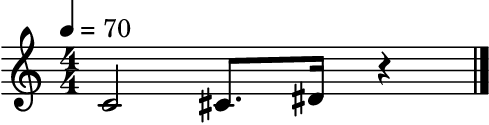

In [3]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

[maelzel.scoring:quant.py:1410:quantizeMeasure:DEBUG] Measure (4, 4) is not filled (events=[«0.000:2.000 2/1♩ 4C», «2.000:2.750 3/4♩ 4C#», «2.750:2.792 1/24♩ 4D#», «2.792:3.000 5/24♩ 4E»]). Filling gaps with silences


Beat: 2 - 3 (dur: 1)
Best 8 divisions: (quantized in 13.3ms)


error,div,snapped,slots,info
0.010242,"(1, 1, 1, 6)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.792 1/24♩ 4D#», «0.792:1.000 5/24♩ 4E»]","[0, 3, 4]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.010729,"(1, 1, 8)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.792 1/24♩ 4D#», «0.792:1.000 5/24♩ 4E»]","[0, 4, 5]","gridError=0, rhythmComplexity=0.333 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.057392,"(1, 8)","[«0.000:0.750 3/4♩ 4C#», «0.750:0.812 1/16♩ 4D#», «0.812:1.000 3/16♩ 4E»]","[0, 5, 6]","gridError=0.0572, rhythmComplexity=0.149 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.069809,"(15,)","[«0.000:0.733 11/15♩ 4C#», «0.733:0.800 1/15♩ 4D#», «0.800:1.000 1/5♩ 4E»]","[0, 11, 12]","gridError=0.0661, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.002025, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.070495,"(9,)","[«0.000:0.778 7/9♩ 4C#», «0.778:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 24)}», «0.778:1.000 2/9♩ 4E»]","[0, 7, 7]","gridError=0.0704, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.087737,"(4,)","[«0.000:0.750 3/4♩ 4C#», «0.750:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 24)}», «0.750:1.000 1/4♩ 4E»]","[0, 3, 3]","gridError=0.0877, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.20263,"(7,)","[«0.000:0.714 5/7♩ 4C#», «0.714:0.857 1/7♩ 4D#», «0.857:1.000 1/7♩ 4E»]","[0, 5, 6]","gridError=0.202, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.23969,"(6,)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.833 1/6♩ 4D#», «0.833:1.000 1/6♩ 4E»]","[0, 4, 5]","gridError=0.24, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1668:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «0.000:1.000 1/1♩ 4C tiedNext»
)
    Node(1/1, 
  «1.000:2.000 1/1♩ 4C tiedPrev»
)
[maelzel.scoring:quant.py:1671:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «0.000:2.000 2/1♩ 4C»
)
[maelzel.scoring:quant.py:1673:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «0.000:2.000 2/1♩ 4C»
)
Node(1/1, 
  «2.000:2.750 3/4♩ 4C#»
  Node(3/2, 
    «2.750:2.792 1/24♩ 3/2 4D#»
    «2.792:2.833 1/24♩ 3/2 4E tiedNext»
    «2.833:3.000 1/6♩ 3/2 4E tiedPrev»
  )
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1673:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «2.000:2.750 3/4♩ 4C#»
  Node(3/2, 
    «2.750:2.792 1/24♩ 3/2 4D#»
    «2.792:2.833 1/24♩ 3/2 4E tiedNext»
    «2.833:3.000 1/6♩ 3/2 4E tiedPrev»
  )
)
Node(1/1, 
  «3.000:4.000 1/1♩ rest»
)
----> no need to extend node over beat
[maelzel.scoring:node.py:550:_splitUnnecessaryNodes:DEBUG] Did not split node Node(


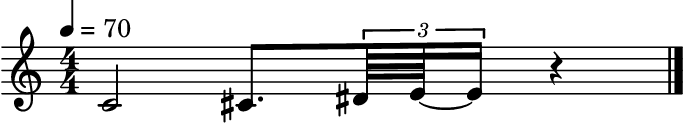

In [3]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)*F(1, 6)),
    (64, F(1, 4)*F(5, 6)),
    # (62, F(3, 4))
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 38.8ms)


error,div,snapped,slots,info
0.0030258,"(5, 5, 1)","[«0.000:0.133 2/15♩ 4C», «0.133:0.267 2/15♩ 4C#», «0.267:0.400 2/15♩ 4D», «0.400:0.533 2/15♩ 4D#», «0.533:0.667 2/15♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 2, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.0745 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0424 (8.485e-05, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.010209,"(15,)","[«0.000:0.133 2/15♩ 4C», «0.133:0.267 2/15♩ 4C#», «0.267:0.400 2/15♩ 4D», «0.400:0.533 2/15♩ 4D#», «0.533:0.667 2/15♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 2, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.149 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.19603,"(8,)","[«0.000:0.125 1/8♩ 4C», «0.125:0.250 1/8♩ 4C#», «0.250:0.375 1/8♩ 4D», «0.375:0.500 1/8♩ 4D#», «0.500:0.625 1/8♩ 4E», «0.625:1.000 3/8♩ 4F tiedNext»]","[0, 1, 2, 3, 4, 5]","gridError=0.196, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.21813,"(7,)","[«0.000:0.143 1/7♩ 4C», «0.143:0.286 1/7♩ 4C#», «0.286:0.429 1/7♩ 4D», «0.429:0.571 1/7♩ 4D#», «0.571:0.714 1/7♩ 4E», «0.714:1.000 2/7♩ 4F tiedNext»]","[0, 1, 2, 3, 4, 5]","gridError=0.218, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.27278,"(6,)","[«0.000:0.167 1/6♩ 4C», «0.167:0.333 1/6♩ 4C#», «0.333:grace 4D properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «0.333:0.500 1/6♩ 4D#», «0.500:0.667 1/6♩ 4E», «0.667:1.000 1/3♩ 4F tiedNext»]","[0, 1, 2, 2, 3, 4]","gridError=0.273, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 1 divisions: (quantized in 232.0µs)


error,div,snapped,slots,info
0,"(3,)","[«0.000:0.333 1/3♩ 4F tiedPrev», «0.333:1.000 2/3♩ rest tiedNext»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



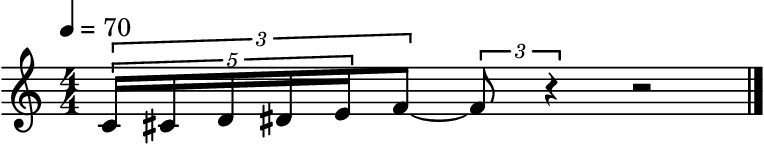

In [1]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    (60, F(2, 3)*F(1, 5)),
    (61, F(2, 3)*F(1, 5)),
    (62, F(2, 3)*F(1, 5)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2,3)),
    #(60, F(2, 7)),
    #(61, F(3, 7)),
    #(62, F(4, 7))
    
    
    ]

struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.rhythmComplexityWeight  = 0.001
quantprofile.debug=True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r.write('~/tmp/bigtriplet.ly')
r

Beat: 0 - 1 (dur: 1)
Best 7 divisions: (quantized in 21.8ms)


error,div,snapped,slots,info
0.0063246,"(1, 1, 1, 2, 2)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.700 1/10♩ 4E», «0.700:0.800 1/10♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 3, 4, 5, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.010954,"(1, 5)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.700 1/10♩ 4E», «0.700:0.800 1/10♩ 4F», «0.800:0.900 1/10♩ 4F#», «0.900:1.000 1/10♩ 4G»]","[0, 2, 3, 4, 5]","gridError=0, rhythmComplexity=0.0894 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.15731,"(11,)","[«0.000:0.636 7/11♩ 4C#», «0.636:0.727 1/11♩ 4E», «0.727:0.818 1/11♩ 4F», «0.818:0.909 1/11♩ 4F#», «0.909:1.000 1/11♩ 4G»]","[0, 7, 8, 9, 10]","gridError=0.154, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.01, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.18226,"(9,)","[«0.000:0.556 5/9♩ 4C#», «0.556:0.667 1/9♩ 4E», «0.667:0.778 1/9♩ 4F», «0.778:0.889 1/9♩ 4F#», «0.889:1.000 1/9♩ 4G»]","[0, 5, 6, 7, 8]","gridError=0.181, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.21538,"(8,)","[«0.000:0.625 5/8♩ 4C#», «0.625:0.750 1/8♩ 4E», «0.750:grace 4F properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 10)}», «0.750:0.875 1/8♩ 4F#», «0.875:1.000 1/8♩ 4G»]","[0, 5, 6, 6, 7]","gridError=0.215, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.22226,"(7,)","[«0.000:0.571 4/7♩ 4C#», «0.571:0.714 1/7♩ 4E», «0.714:0.857 1/7♩ 4F», «0.857:grace 4F# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 10)}», «0.857:1.000 1/7♩ 4G»]","[0, 4, 5, 6, 6]","gridError=0.222, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.29005,"(6,)","[«0.000:0.667 2/3♩ 4C#», «0.667:grace 4E properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 10)}», «0.667:0.833 1/6♩ 4F», «0.833:grace 4F# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 10)}», «0.833:1.000 1/6♩ 4G»]","[0, 4, 4, 5, 5]","gridError=0.29, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 6 divisions: (quantized in 42.1ms)


error,div,snapped,slots,info
0.032694,"(5, 5, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.533 1/3♩ 4D», «0.533:1.000 7/15♩ rest tiedNext»]","[0, 3, 8]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=2, numTies=0), divPenalty=0.0424 (0.004243, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.053631,"(5, 9)","[«0.000:0.200 1/5♩ 4C», «0.200:0.556 16/45♩ 4D», «0.556:1.000 4/9♩ rest tiedNext»]","[0, 2, 6]","gridError=0.0485, rhythmComplexity=0.149 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0548 (0.005477, divPenalty=0.0447, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.067406,"(5, 1)","[«0.000:0.200 1/5♩ 4C», «0.200:0.500 3/10♩ 4D», «0.500:1.000 1/2♩ rest tiedNext»]","[0, 2, 5]","gridError=0.0671, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.070632,"(15,)","[«0.000:0.200 1/5♩ 4C», «0.200:0.533 1/3♩ 4D», «0.533:1.000 7/15♩ rest tiedNext»]","[0, 3, 8]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.02025, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.075396,"(9,)","[«0.000:0.222 2/9♩ 4C», «0.222:0.556 1/3♩ 4D», «0.556:1.000 4/9♩ rest tiedNext»]","[0, 2, 5]","gridError=0.0743, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.103,"(6,)","[«0.000:0.167 1/6♩ 4C», «0.167:0.500 1/3♩ 4D», «0.500:1.000 1/2♩ rest tiedNext»]","[0, 1, 3]","gridError=0.103, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



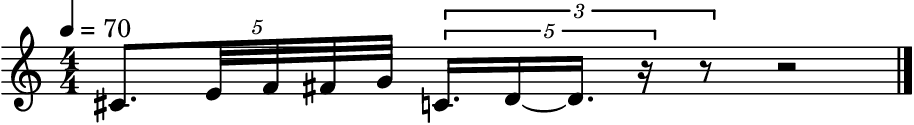

In [2]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    (61, F(1, 2)+F(1,10)),
    (64, F(1, 10)),
    (65, F(1, 10)),
    (66, F(1, 10)),
    (67, F(1, 10)),
    
    (60, F(1, 5)),
    (62, F(1, 3)),
    
]
struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', nestedTuplets=True)
quantprofile.divisionErrorWeight = 0.1
quantprofile.rhythmComplexityWeight = 0.01
quantprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 750.8µs)


error,div,snapped,slots,info
0,"(3,)","[«0.000:0.667 2/3♩ 4C#», «0.667:1.000 1/3♩ 4E tiedNext»]","[0, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.12855,"(5,)","[«0.000:0.600 3/5♩ 4C#», «0.600:1.000 2/5♩ 4E tiedNext»]","[0, 3]","gridError=0.128, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 2 divisions: (quantized in 195.3µs)


error,div,snapped,slots,info
0,"(3,)","[«0.000:0.333 1/3♩ 4E tiedPrev», «0.333:0.667 1/3♩ 4F», «0.667:1.000 1/3♩ 4F+»]","[0, 1, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.23162,"(5,)","[«0.000:0.400 2/5♩ 4E tiedPrev», «0.400:0.600 1/5♩ 4F», «0.600:1.000 2/5♩ 4F+»]","[0, 2, 3]","gridError=0.232, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



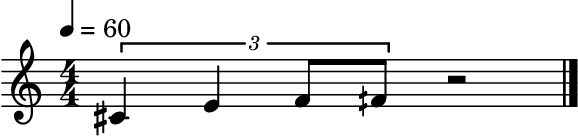

In [3]:
from maelzel import scoring
from maelzel.common import F
from maelzel.scorestruct import ScoreStruct

notes = [
    (61, F(2, 3)),
    (64, F(2, 3)),
    (65, F(1, 3)),
    (65.5, F(1, 3)),
]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)

struct = ScoreStruct(timesig='4/4', tempo=60)

quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', divisionErrorWeight=0.05)
quantprofile.debug= True

qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Score(1 voices)
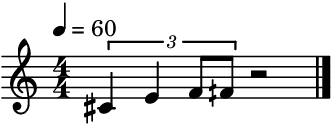

In [4]:
sco = r.quantizedScore.toCoreScore()
sco

# TODO

In [11]:
import logging
logging.basicConfig(level="DEBUG")
logging.getLogger("maelzel.scoring").setLevel(logging.DEBUG)


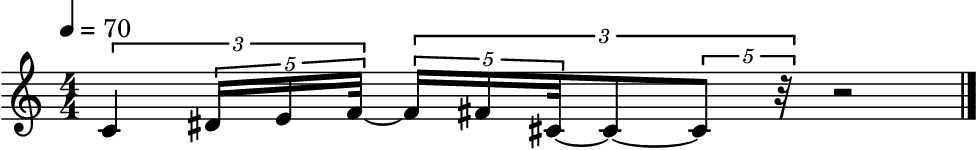

In [5]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2, 3)*F(3, 10)),
    (66, F(2, 3)*F(1, 5)),
    # (67, F(2, 3)*F(1, 5)),  
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.debug = False

# quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

Beat: 0 - 1 (dur: 1)
Best 4 divisions: (quantized in 13.2ms)


error,div,snapped,slots,info
0.0016733,"(1, 1, 5)","[«0.000:0.667 2/3♩ 4C», «0.667:0.733 1/15♩ 4D#», «0.733:0.800 1/15♩ 4E», «0.800:1.000 1/5♩ 4F»]","[0, 2, 3, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0093274,"(15,)","[«0.000:0.667 2/3♩ 4C», «0.667:0.733 1/15♩ 4D#», «0.733:0.800 1/15♩ 4E», «0.800:1.000 1/5♩ 4F»]","[0, 10, 11, 12]","gridError=0, rhythmComplexity=0.224 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.11052,"(9,)","[«0.000:0.667 2/3♩ 4C», «0.667:0.778 1/9♩ 4D#», «0.778:grace 4E properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «0.778:1.000 2/9♩ 4F»]","[0, 6, 7, 7]","gridError=0.111, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.18981,"(6,)","[«0.000:0.667 2/3♩ 4C», «0.667:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «0.667:0.833 1/6♩ 4E», «0.833:1.000 1/6♩ 4F»]","[0, 4, 4, 5]","gridError=0.19, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 4 divisions: (quantized in 9.3ms)


error,div,snapped,slots,info
0.0016733,"(5, 1, 1)","[«0.000:0.067 1/15♩ 4F#», «0.067:0.133 1/15♩ 4D#», «0.133:0.200 1/15♩ 4E», «0.200:0.333 2/15♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 1, 2, 3, 5]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0092304,"(15,)","[«0.000:0.067 1/15♩ 4F#», «0.067:0.133 1/15♩ 4D#», «0.133:0.200 1/15♩ 4E», «0.200:0.333 2/15♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 1, 2, 3, 5]","gridError=0, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.15018,"(9,)","[«0.000:0.111 1/9♩ 4F#», «0.111:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «0.111:0.222 1/9♩ 4E», «0.222:0.333 1/9♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 1, 1, 2, 3]","gridError=0.15, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.21705,"(6,)","[«0.000:grace 4F# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «0.000:0.167 1/6♩ 4D#», «0.167:grace 4E properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 15)}», «0.167:0.333 1/6♩ 4F», «0.333:1.000 2/3♩ 4C#»]","[0, 0, 1, 1, 2]","gridError=0.217, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



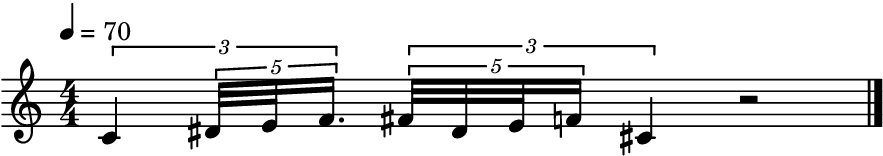

In [6]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 10)),
    (64, F(2, 3)*F(1, 10)),
    (65, F(2, 3)*F(3, 10)),
    
    (66, F(2, 3)*F(1, 10)),
    (63, F(2, 3)*F(1, 10)),
    (64, F(2, 3)*F(1, 10)),
    (65, F(2, 3)*F(2, 10)),
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
#quantprofile.rhythmComplexityWeight = 0.001
#quantprofile.divisionErrorWeight = 0.01
quantprofile.minBeatFractionAcrossBeats = F(1, 8)
quantprofile.minSymbolicDurationAcrossBeat = F(1, 3)

qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

Beat: 0 - 1 (dur: 1)
Best 8 divisions: (quantized in 70.5ms)


error,div,snapped,slots,info
0.0015492,"(8, 8)","[«0.000:0.250 1/4♩ 4C», «0.250:0.438 3/16♩ 4D#», «0.438:0.625 3/16♩ 4E», «0.625:0.812 3/16♩ 4F», «0.812:1.000 3/16♩ 4F#»]","[0, 4, 7, 10, 13]","gridError=0, rhythmComplexity=0.0894 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0283 (5.657e-05, divPenalty=0.0283, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.057212,"(6, 8)","[«0.000:0.250 1/4♩ 4C», «0.250:0.417 1/6♩ 4D#», «0.417:0.625 5/24♩ 4E», «0.625:0.812 3/16♩ 4F», «0.812:1.000 3/16♩ 4F#»]","[0, 3, 5, 8, 11]","gridError=0.0572, rhythmComplexity=0.2 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.0283 (5.657e-05, divPenalty=0.0283, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.081706,"(8, 5)","[«0.000:0.250 1/4♩ 4C», «0.250:0.438 3/16♩ 4D#», «0.438:0.600 13/80♩ 4E», «0.600:0.800 1/5♩ 4F», «0.800:1.000 1/5♩ 4F#»]","[0, 4, 7, 9, 11]","gridError=0.0817, rhythmComplexity=0.2 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.0283 (5.657e-05, divPenalty=0.0283, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1059,"(11,)","[«0.000:0.273 3/11♩ 4C», «0.273:0.455 2/11♩ 4D#», «0.455:0.636 2/11♩ 4E», «0.636:0.818 2/11♩ 4F», «0.818:1.000 2/11♩ 4F#»]","[0, 3, 5, 7, 9]","gridError=0.106, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.21336,"(9,)","[«0.000:0.222 2/9♩ 4C», «0.222:0.444 2/9♩ 4D#», «0.444:0.667 2/9♩ 4E», «0.667:0.778 1/9♩ 4F», «0.778:1.000 2/9♩ 4F#»]","[0, 2, 4, 6, 7]","gridError=0.213, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.23968,"(8,)","[«0.000:0.250 1/4♩ 4C», «0.250:0.375 1/8♩ 4D#», «0.375:0.625 1/4♩ 4E», «0.625:0.750 1/8♩ 4F», «0.750:1.000 1/4♩ 4F#»]","[0, 2, 3, 5, 6]","gridError=0.24, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.26087,"(7,)","[«0.000:0.286 2/7♩ 4C», «0.286:0.429 1/7♩ 4D#», «0.429:0.571 1/7♩ 4E», «0.571:0.857 2/7♩ 4F», «0.857:1.000 1/7♩ 4F#»]","[0, 2, 3, 4, 6]","gridError=0.261, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.29918,"(6,)","[«0.000:0.333 1/3♩ 4C», «0.333:0.500 1/6♩ 4D#», «0.500:0.667 1/6♩ 4E», «0.667:0.833 1/6♩ 4F», «0.833:1.000 1/6♩ 4F#»]","[0, 2, 3, 4, 5]","gridError=0.299, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 3 divisions: (quantized in 15.1ms)


error,div,snapped,slots,info
0.0050794,"(8, 1)","[«0.000:0.188 3/16♩ 4G», «0.188:1.000 13/16♩ 4C tiedNext»]","[0, 3]","gridError=0, rhythmComplexity=0.5 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.021182,"(11,)","[«0.000:0.182 2/11♩ 4G», «0.182:1.000 9/11♩ 4C tiedNext»]","[0, 2]","gridError=0.0202, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.057345,"(6,)","[«0.000:0.167 1/6♩ 4G», «0.167:1.000 5/6♩ 4C tiedNext»]","[0, 1]","gridError=0.0572, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 15.4ms)


error,div,snapped,slots,info
0.0050794,"(8, 1)","[«0.000:0.188 3/16♩ 4C tiedPrev», «0.188:1.000 13/16♩ rest tiedNext»]","[0, 3]","gridError=0, rhythmComplexity=0.5 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.01748,"(11,)","[«0.000:0.182 2/11♩ 4C tiedPrev», «0.182:1.000 9/11♩ rest tiedNext»]","[0, 2]","gridError=0.0163, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.046302,"(6,)","[«0.000:0.167 1/6♩ 4C tiedPrev», «0.167:1.000 5/6♩ rest tiedNext»]","[0, 1]","gridError=0.0461, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



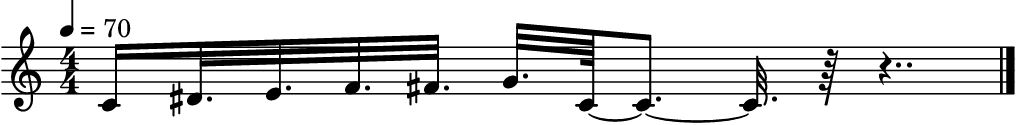

In [7]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(1, 4)),
    (63, F(1, 4)*F(3, 4)),
    (64, F(1, 4)*F(3, 4)),
    (65, F(1, 4)*F(3, 4)),
    (66, F(1, 4)*F(3, 4)),
    (67, F(1, 4)*F(3, 4)),
    (60, F(1)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1414:quantizeMeasure:DEBUG] Measure (4, 4) is not filled (events=[«0.000:0.250 1/4♩ 4C tiedNext spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, uuid=4ta5lfw6)]», «0.250:0.500 1/4♩ 4C gliss tiedNext», «0.500:0.750 1/4♩ 4C gliss tiedPrev», «0.750:1.000 1/4♩ 4F spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=4ta5lfw6)]»]). Filling gaps with silences
[maelzel.scoring:quant.py:1676:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «0.000:0.250 1/4♩ 4C tiedNext spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, uuid=4ta5lfw6)]»
  «0.250:0.750 1/2♩ 4C gliss»
  «0.750:1.000 1/4♩ 4F spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=4ta5lfw6)]»
)
Node(1/1, 
  «1.000:2.000 1/1♩ rest»
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1672:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «1.000:2.000 1/1♩ rest»
)
    Node(1/1, 
  «2.000:3.000 1/1♩ rest»
)
[maelzel.scoring:quant.py:1672:_mergeSiblin

UnquantizedPart #0:
  Measure #0
    Timesig: 4/4 (quarter=70)
    Node ratio: 1/1, offset=0, end=4
      Node ratio: 1/1, offset=0, end=1
        «0.000:0.250 1/4♩ 4C tiedNext spanners=[Slur(kind=start, linetype=solid, nestingLevel=1,
          uuid=4ta5lfw6)]»
        «0.250:0.750 1/2♩ 4C gliss»
        «0.750:1.000 1/4♩ 4F spanners=[Slur(kind=end, linetype=solid, nestingLevel=1,
          uuid=4ta5lfw6)]»
      Node ratio: 1/1, offset=1, end=4
        «1.000:4.000 3/1♩ rest»


[maelzel.scoring:renderlily.py:1095:write:DEBUG] Found crop file /tmp/tmpw7ooelb6.cropped.png, using that as output



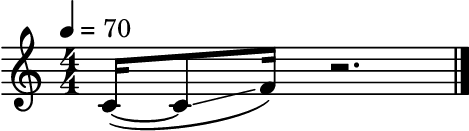

In [12]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(1, 4), tiedNext=True),
    makeNote(60, F(1, 4), tiedNext=True, gliss=True),
    makeNote(60, F(1, 4), tiedPrev=True),
    makeNote(65, F(1, 4))
]

notes[0].addSpanner(spanner.Slur(), notes[-1])
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
score.dump()
r # .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 22.1ms)


error,div,snapped,slots,info
0.002,"(8,)","[«0.000:0.375 3/8♩ 4D», «0.375:0.750 3/8♩ 4C», «0.750:1.000 1/4♩ 4D tiedNext»]","[0, 3, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.12589,"(5,)","[«0.000:0.400 2/5♩ 4D», «0.400:0.800 2/5♩ 4C», «0.800:1.000 1/5♩ 4D tiedNext»]","[0, 2, 4]","gridError=0.126, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 3/2 (dur: 1/2)
Best 3 divisions: (quantized in 2.7ms)


error,div,snapped,slots,info
0.002,"(4,)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.076918,"(7,)","[«0.000:0.143 1/7♩ 4D tiedPrev», «0.143:0.500 5/14♩ 4C»]","[0, 2]","gridError=0.0756, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10062,"(5,)","[«0.000:0.100 1/10♩ 4D tiedPrev», «0.100:0.500 2/5♩ 4C»]","[0, 1]","gridError=0.101, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3/2 - 5/2 (dur: 1)
Best 9 divisions: (quantized in 146.9ms)


error,div,snapped,slots,info
0.0045915,"(5, 5, 2)","[«0.000:0.133 2/15♩ 4C#», «0.133:0.267 2/15♩ 4D», «0.267:0.400 2/15♩ 4D#», «0.400:0.533 2/15♩ 4E», «0.533:0.667 2/15♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 2, 4, 6, 8, 10, 11]","gridError=0, rhythmComplexity=0.0639 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0412 (0.0004123, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.072636,"(11, 9)","[«0.000:0.136 3/22♩ 4C#», «0.136:0.273 3/22♩ 4D», «0.273:0.409 3/22♩ 4D#», «0.409:0.556 0.146♩ 4E», «0.556:0.667 1/9♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 3, 6, 9, 12, 14, 17]","gridError=0.0717, rhythmComplexity=0.143 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.108 (0.001077, divPenalty=0.108, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.097154,"(11, 3)","[«0.000:0.136 3/22♩ 4C#», «0.136:0.273 3/22♩ 4D», «0.273:0.409 3/22♩ 4D#», «0.409:0.500 1/11♩ 4E», «0.500:0.667 1/6♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 3, 6, 9, 11, 12, 13]","gridError=0.0966, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.001, divPenalty=0.1, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.12113,"(7, 9)","[«0.000:0.143 1/7♩ 4C#», «0.143:0.286 1/7♩ 4D», «0.286:0.429 1/7♩ 4D#», «0.429:0.556 8/63♩ 4E», «0.556:0.667 1/9♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 2, 4, 6, 8, 10, 13]","gridError=0.121, rhythmComplexity=0.0639 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0447 (0.0004472, divPenalty=0.0447, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.12734,"(4, 3)","[«0.000:0.125 1/8♩ 4C#», «0.125:0.250 1/8♩ 4D», «0.250:0.375 1/8♩ 4D#», «0.375:0.500 1/8♩ 4E», «0.500:0.667 1/6♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 1, 2, 3, 4, 5, 6]","gridError=0.127, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.18135,"(5, 3)","[«0.000:0.100 1/10♩ 4C#», «0.100:0.300 1/5♩ 4D», «0.300:0.400 1/10♩ 4D#», «0.400:0.500 1/10♩ 4E», «0.500:0.667 1/6♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 1, 3, 4, 5, 6, 7]","gridError=0.181, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.22401,"(7,)","[«0.000:0.143 1/7♩ 4C#», «0.143:0.286 1/7♩ 4D», «0.286:0.429 1/7♩ 4D#», «0.429:0.571 1/7♩ 4E», «0.571:0.714 1/7♩ 4F», «0.714:0.857 1/7♩ 4F#», «0.857:1.000 1/7♩ 4G»]","[0, 1, 2, 3, 4, 5, 6]","gridError=0.224, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.25151,"(6,)","[«0.000:0.167 1/6♩ 4C#», «0.167:0.333 1/6♩ 4D», «0.333:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «0.333:0.500 1/6♩ 4E», «0.500:0.667 1/6♩ 4F», «0.667:0.833 1/6♩ 4F#», «0.833:1.000 1/6♩ 4G»]","[0, 1, 2, 2, 3, 4, 5]","gridError=0.252, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.37389,"(5,)","[«0.000:0.200 1/5♩ 4C#», «0.200:grace 4D properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «0.200:0.400 1/5♩ 4D#», «0.400:0.600 1/5♩ 4E», «0.600:grace 4F properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «0.600:0.800 1/5♩ 4F#», «0.800:1.000 1/5♩ 4G»]","[0, 1, 1, 2, 3, 3, 4]","gridError=0.374, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 6 divisions: (quantized in 66.1ms)


error,div,snapped,slots,info
0.037261,"(4, 11)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.636 3/22♩ 4C#», «0.636:0.773 3/22♩ 4D», «0.773:0.909 3/22♩ 4D#», «0.909:1.000 1/11♩ 4E tiedNext»]","[0, 1, 4, 7, 10, 13]","gridError=0.0358, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.102 (0.00102, divPenalty=0.102, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.070325,"(7, 11)","[«0.000:0.143 1/7♩ 4D tiedPrev», «0.143:0.500 5/14♩ 4C», «0.500:0.636 3/22♩ 4C#», «0.636:0.773 3/22♩ 4D», «0.773:0.909 3/22♩ 4D#», «0.909:1.000 1/11♩ 4E tiedNext»]","[0, 2, 7, 10, 13, 16]","gridError=0.0694, rhythmComplexity=0.149 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.102 (0.00102, divPenalty=0.102, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.082793,"(5, 11)","[«0.000:0.100 1/10♩ 4D tiedPrev», «0.100:0.500 2/5♩ 4C», «0.500:0.636 3/22♩ 4C#», «0.636:0.773 3/22♩ 4D», «0.773:0.909 3/22♩ 4D#», «0.909:1.000 1/11♩ 4E tiedNext»]","[0, 1, 5, 8, 11, 14]","gridError=0.0822, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.102 (0.00102, divPenalty=0.102, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.084703,"(8,)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.500 3/8♩ 4C», «0.500:0.625 1/8♩ 4C#», «0.625:0.750 1/8♩ 4D», «0.750:0.875 1/8♩ 4D#», «0.875:1.000 1/8♩ 4E tiedNext»]","[0, 1, 4, 5, 6, 7]","gridError=0.0847, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.28218,"(6,)","[«0.000:0.167 1/6♩ 4D tiedPrev», «0.167:0.500 1/3♩ 4C», «0.500:0.667 1/6♩ 4C#», «0.667:0.833 1/6♩ 4D», «0.833:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «0.833:1.000 1/6♩ 4E tiedNext»]","[0, 1, 3, 4, 5, 5]","gridError=0.282, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.47579,"(5,)","[«0.000:0.200 1/5♩ 4D tiedPrev», «0.200:0.400 1/5♩ 4C», «0.400:0.600 1/5♩ 4C#», «0.600:0.800 1/5♩ 4D», «0.800:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(2, 15)}», «0.800:1.000 1/5♩ 4E tiedNext»]","[0, 1, 2, 3, 4, 4]","gridError=0.476, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 5/2 (dur: 1/2)
Best 5 divisions: (quantized in 2.2ms)


error,div,snapped,slots,info
0.039593,"(4, 1, 1)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.167 1/8♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 4, 5]","gridError=0.0395, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.03975,"(6, 3)","[«0.000:0.042 1/24♩ 4E tiedPrev», «0.042:0.167 1/8♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 4, 7]","gridError=0.0395, rhythmComplexity=0.112 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.091108,"(9,)","[«0.000:0.056 1/18♩ 4E tiedPrev», «0.056:0.167 1/9♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 1, 3, 6]","gridError=0.091, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10912,"(3,)","[«0.000:grace 4E tiedPrev properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 30)}», «0.000:0.167 1/6♩ 4F», «0.167:0.333 1/6♩ 4F#», «0.333:0.500 1/6♩ 4G»]","[0, 0, 1, 2]","gridError=0.109, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.30838,"(5,)","[«0.000:grace 4E tiedPrev properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 30)}», «0.000:0.200 1/5♩ 4F», «0.200:0.300 1/10♩ 4F#», «0.300:0.500 1/5♩ 4G»]","[0, 0, 2, 3]","gridError=0.308, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Error: 0.005591473908568057, division: [Fraction(1, 2), Fraction(1, 1)]
Error: 0.05705716955950854, division: [Fraction(1, 1), Fraction(1, 2)]



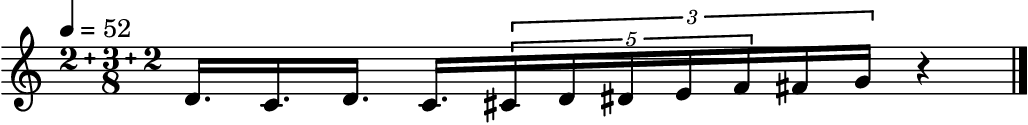

In [8]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    
    makeNote(61, F(2, 3)*F(1, 5)),
    makeNote(62, F(2, 3)*F(1, 5)),
    makeNote(63, F(2, 3)*F(1, 5)),
    makeNote(64, F(2, 3)*F(1, 5)),
    makeNote(65, F(2, 3)*F(1, 5)),
    makeNote(66, F(2, 3)*F(1, 4)),
    makeNote(67, F(2, 3)*F(1, 4)), 
    
]

struct = ScoreStruct(timesig='7/8', tempo=52)
struct.getMeasureDef(0).subdivisionStructure = (2, 3, 2)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 23.0ms)


error,div,snapped,slots,info
0.003,"(1, 1, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10083,"(8,)","[«0.000:0.625 5/8♩ 4C», «0.625:0.875 1/4♩ 4C#», «0.875:1.000 1/8♩ 4D tiedNext»]","[0, 5, 7]","gridError=0.1, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11005,"(6,)","[«0.000:0.667 2/3♩ 4C», «0.667:0.833 1/6♩ 4C#», «0.833:1.000 1/6♩ 4D tiedNext»]","[0, 4, 5]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.22696,"(5,)","[«0.000:0.600 3/5♩ 4C», «0.600:0.800 1/5♩ 4C#», «0.800:1.000 1/5♩ 4D tiedNext»]","[0, 3, 4]","gridError=0.227, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 23.7ms)


error,div,snapped,slots,info
0.003,"(3, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.333 2/9♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.333 2/9♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10083,"(8,)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.375 1/4♩ 4D#», «0.375:1.000 5/8♩ 4E»]","[0, 1, 3]","gridError=0.1, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11005,"(6,)","[«0.000:0.167 1/6♩ 4D tiedPrev», «0.167:0.333 1/6♩ 4D#», «0.333:1.000 2/3♩ 4E»]","[0, 1, 2]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.22696,"(5,)","[«0.000:0.200 1/5♩ 4D tiedPrev», «0.200:0.400 1/5♩ 4D#», «0.400:1.000 3/5♩ 4E»]","[0, 1, 2]","gridError=0.227, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



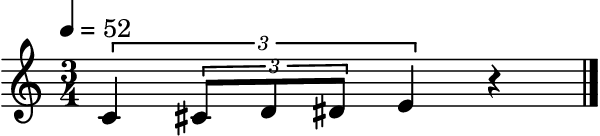

In [9]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3)),
    makeNote(61, F(2, 9)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(2, 9)),
    makeNote(64, F(2, 3)),
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 29.8ms)


error,div,snapped,slots,info
0.003,"(1, 1, 3)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.667 2/3♩ 4C», «0.667:0.889 2/9♩ 4C#», «0.889:1.000 1/9♩ 4D tiedNext»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10083,"(8,)","[«0.000:0.625 5/8♩ 4C», «0.625:0.875 1/4♩ 4C#», «0.875:1.000 1/8♩ 4D tiedNext»]","[0, 5, 7]","gridError=0.1, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11005,"(6,)","[«0.000:0.667 2/3♩ 4C», «0.667:0.833 1/6♩ 4C#», «0.833:1.000 1/6♩ 4D tiedNext»]","[0, 4, 5]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.22696,"(5,)","[«0.000:0.600 3/5♩ 4C», «0.600:0.800 1/5♩ 4C#», «0.800:1.000 1/5♩ 4D tiedNext»]","[0, 3, 4]","gridError=0.227, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 8.3ms)


error,div,snapped,slots,info
0.003,"(3, 1, 1)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.222 1/9♩ 4D#», «0.222:0.333 1/9♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.111 1/9♩ 4D tiedPrev», «0.111:0.222 1/9♩ 4D#», «0.222:0.333 1/9♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.13093,"(8,)","[«0.000:0.125 1/8♩ 4D tiedPrev», «0.125:0.250 1/8♩ 4D#», «0.250:0.375 1/8♩ 4E», «0.375:1.000 5/8♩ 4F»]","[0, 1, 2, 3]","gridError=0.131, rhythmComplexity=0.224 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.16416,"(6,)","[«0.000:0.167 1/6♩ 4D tiedPrev», «0.167:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 9)}», «0.167:0.333 1/6♩ 4E», «0.333:1.000 2/3♩ 4F»]","[0, 1, 1, 2]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.25138,"(5,)","[«0.000:0.200 1/5♩ 4D tiedPrev», «0.200:grace 4D# properties={'.snappedGracenote': True, 'originalDuration': Fraction(1, 9)}», «0.200:0.400 1/5♩ 4E», «0.400:1.000 3/5♩ 4F»]","[0, 1, 1, 2]","gridError=0.251, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



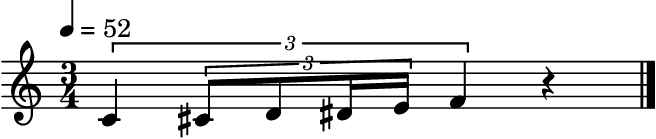

In [10]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3)),
    makeNote(61, F(2, 9)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(1, 9)),
    makeNote(64, F(1, 9)),
    
    makeNote(65, F(2, 3)),
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 906.5µs)


error,div,snapped,slots,info
0,"(3,)","[«0.000:0.333 1/3♩ rest», «0.333:1.000 2/3♩ 4C»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.12849,"(5,)","[«0.000:0.400 2/5♩ rest», «0.400:1.000 3/5♩ 4C»]","[0, 2]","gridError=0.128, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 27.5ms)


error,div,snapped,slots,info
0.003,"(1, 1, 3)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.889 2/9♩ 4D», «0.889:1.000 1/9♩ 4D#»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.004,"(9,)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.889 2/9♩ 4D», «0.889:1.000 1/9♩ 4D#»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10083,"(8,)","[«0.000:0.625 5/8♩ 4C#», «0.625:0.875 1/4♩ 4D», «0.875:1.000 1/8♩ 4D#»]","[0, 5, 7]","gridError=0.1, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11005,"(6,)","[«0.000:0.667 2/3♩ 4C#», «0.667:0.833 1/6♩ 4D», «0.833:1.000 1/6♩ 4D#»]","[0, 4, 5]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.22696,"(5,)","[«0.000:0.600 3/5♩ 4C#», «0.600:0.800 1/5♩ 4D», «0.800:1.000 1/5♩ 4D#»]","[0, 3, 4]","gridError=0.227, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Best 5 divisions: (quantized in 7.0ms)


error,div,snapped,slots,info
0.004,"(9,)","[«0.000:0.111 1/9♩ 4E», «0.111:1.000 8/9♩ rest»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.027006,"(8,)","[«0.000:0.125 1/8♩ 4E», «0.125:1.000 7/8♩ rest»]","[0, 1]","gridError=0.0269, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.054417,"(7,)","[«0.000:0.143 1/7♩ 4E», «0.143:1.000 6/7♩ rest»]","[0, 1]","gridError=0.0544, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.088661,"(6,)","[«0.000:0.167 1/6♩ 4E», «0.167:1.000 5/6♩ rest»]","[0, 1]","gridError=0.0875, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.13049,"(5,)","[«0.000:0.200 1/5♩ 4E», «0.200:1.000 4/5♩ rest»]","[0, 1]","gridError=0.13, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



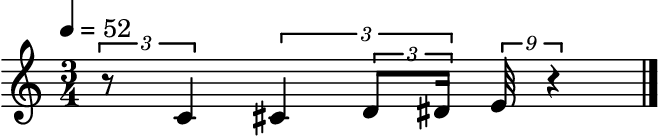

In [11]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3), offset=F(1, 3)),
    makeNote(61, F(2, 3)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(1, 9)),
    makeNote(64, F(1, 9)),
    
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
#quantprofile.maxGridDensity = 32
#quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')